In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from surprise import Dataset

Imamo 18 definisanih žanrova i jedan nedefinisani u skupu podataka i to su sledeći žanrovi:

In [3]:
genres=['unknown','Action','Adventure','Animation','Children\'s','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western',]

In [4]:
len(genres)

19

Učitavamo potrebne podatke. O svakom filmu ime, datum i žanrove kojima pripada. Jednom filmu može odgovarati više žanrova. Jedinica označava pripadanje odgovoarajućem žanru.

In [5]:
zanrovi=pd.read_csv('ml-100k/item.txt',sep='|',names=['Movie ID','Movie name','date','a','b']+genres,header=None)

In [6]:
zanrovi=pd.DataFrame(zanrovi.drop(columns=['a','b']))

In [7]:
zanrovi.head()

,Movie ID,Movie name,date,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


Učitavamo informacije o korisnicima, za svakog godine, pol, čime se bavi, i poštanski broj mesta gde živi.

In [8]:
users=pd.read_csv('ml-100k/user.txt',sep='|',names=['user ID','age','gender','occupation','zip code'],header=None)

In [9]:
users.head()

,user ID,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


Iscrtavamo informacije o polu korisnika koji su ocenjivali filmove.

In [10]:
muski=np.where(users['gender']=='M')[0].size
zenski=np.where(users['gender']=='F')[0].size

<BarContainer object of 2 artists>

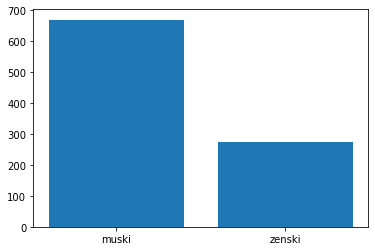

In [11]:
plt.bar(x=['muski','zenski'],height=[muski,zenski])

Primećujemo da ima znatno više muških korisnika nego ženskih.

Iscrtavamo infomacije o broju filmova odgovarajućih žanrova.

In [12]:
movie_count=zanrovi.sum()
movie_count.drop('Movie name',inplace=True)
movie_count.drop('Movie ID',inplace=True)

<BarContainer object of 19 artists>

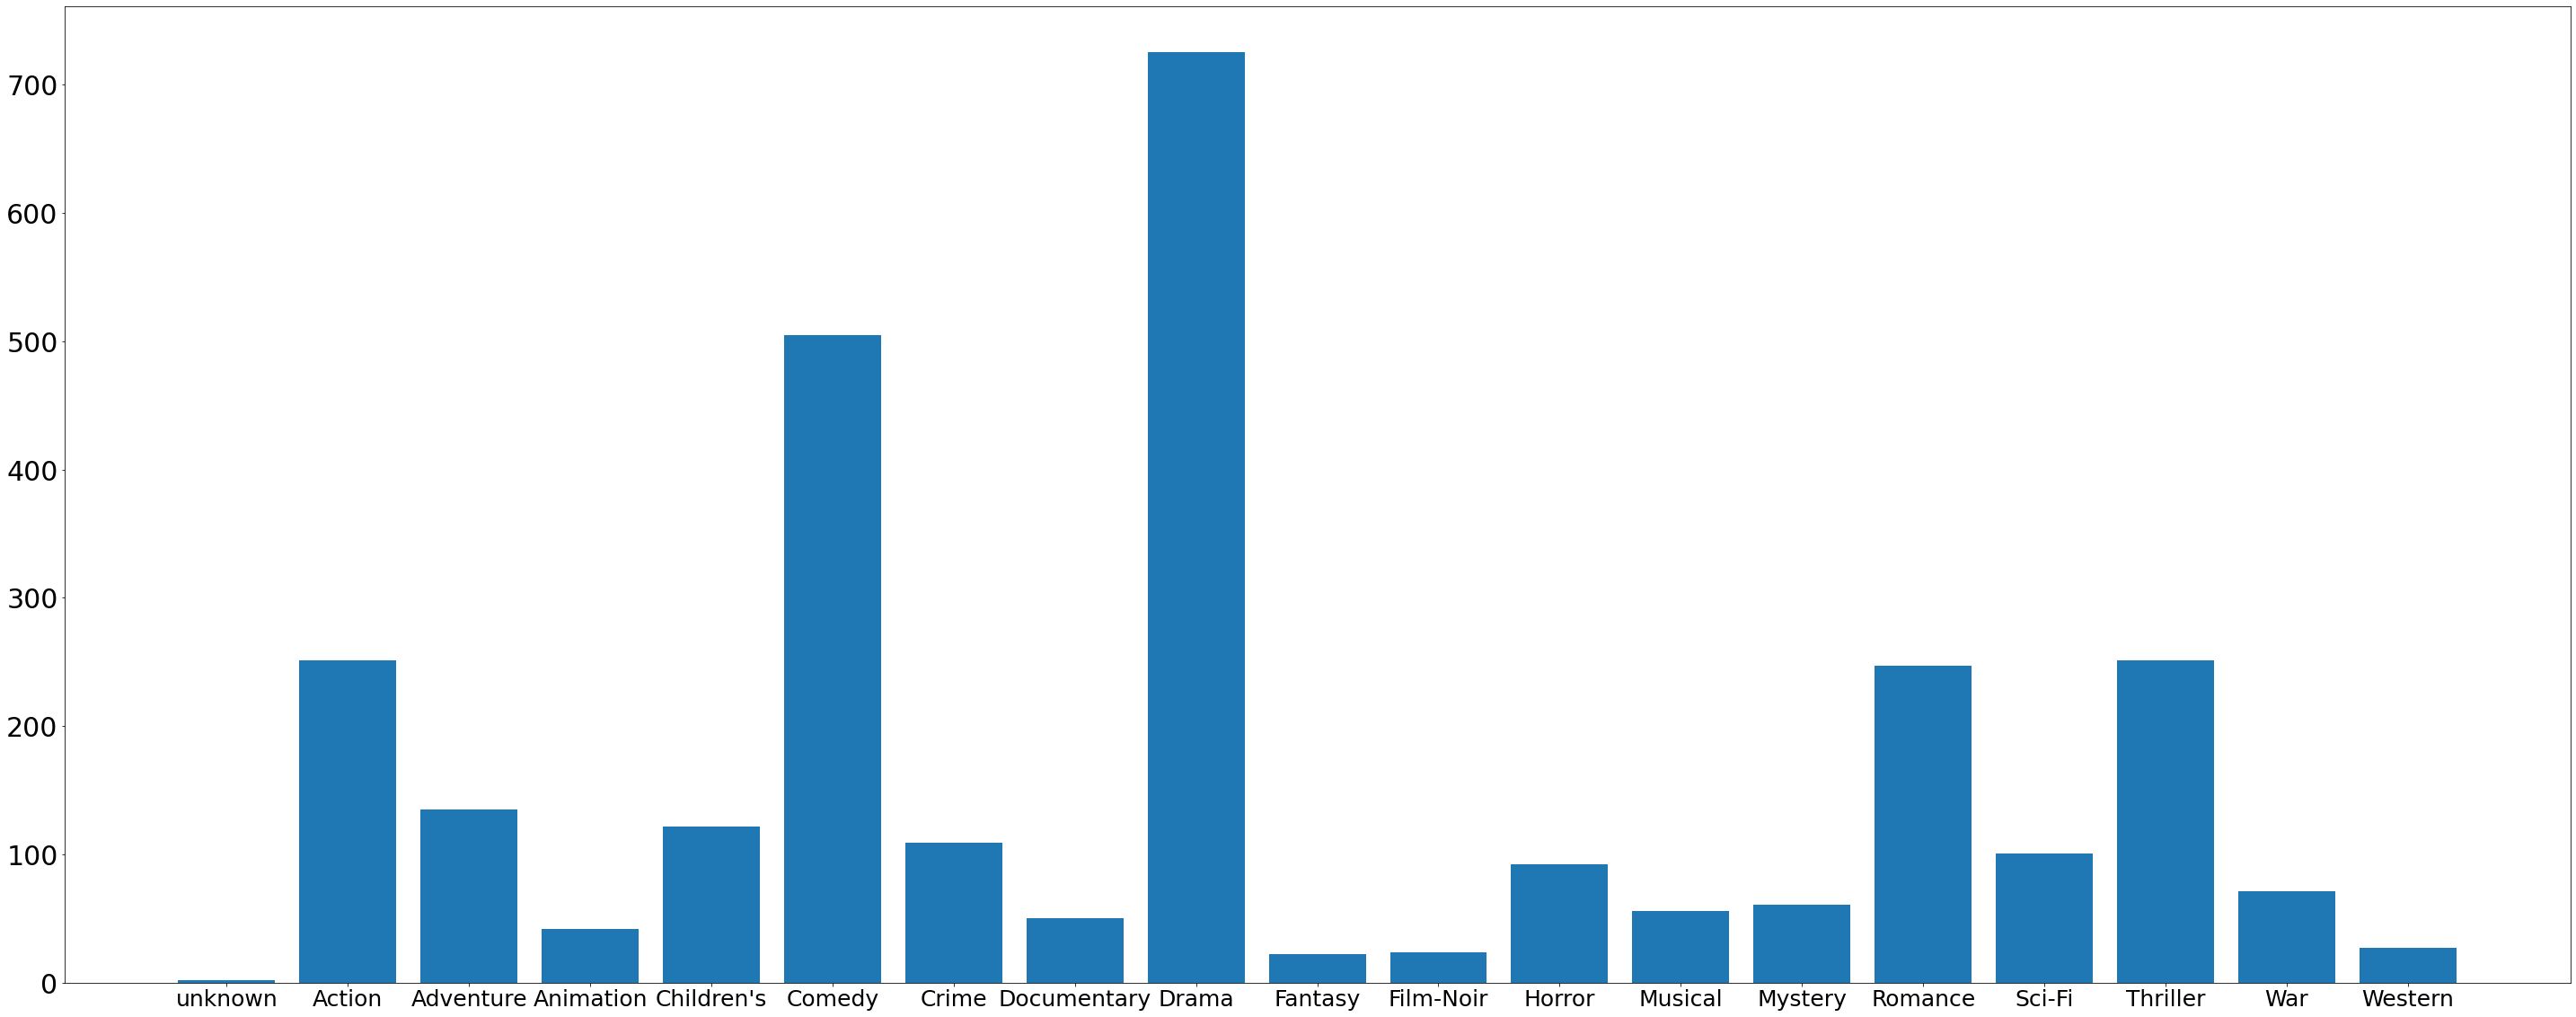

In [13]:
plt.figure(figsize=(50,20))
plt.xticks(fontsize=25)
plt.yticks(fontsize=30)
plt.bar(x=genres,height=movie_count.values)

In [38]:
users_values=users.values
zanrovi_values=zanrovi.values

In [39]:
data=Dataset.load_builtin('ml-100k')

In [40]:
proseci=np.zeros(19)
brojevi_ocena=np.zeros(19,dtype='int')

for userId,movieId,rating,_ in data.raw_ratings:
    userId=int(userId)
    movieId=int(movieId)-1
    
    for i in range(3,22):
        if(zanrovi_values[movieId][i]==1):
            #i-3 je indeks zanra
            proseci[i-3]+=float(rating)
            brojevi_ocena[i-3]+=1
for i in range(0,19):
        proseci[i]=proseci[i]/brojevi_ocena[i]

Predstavljamo proseke ocena po žanrovima

<BarContainer object of 19 artists>

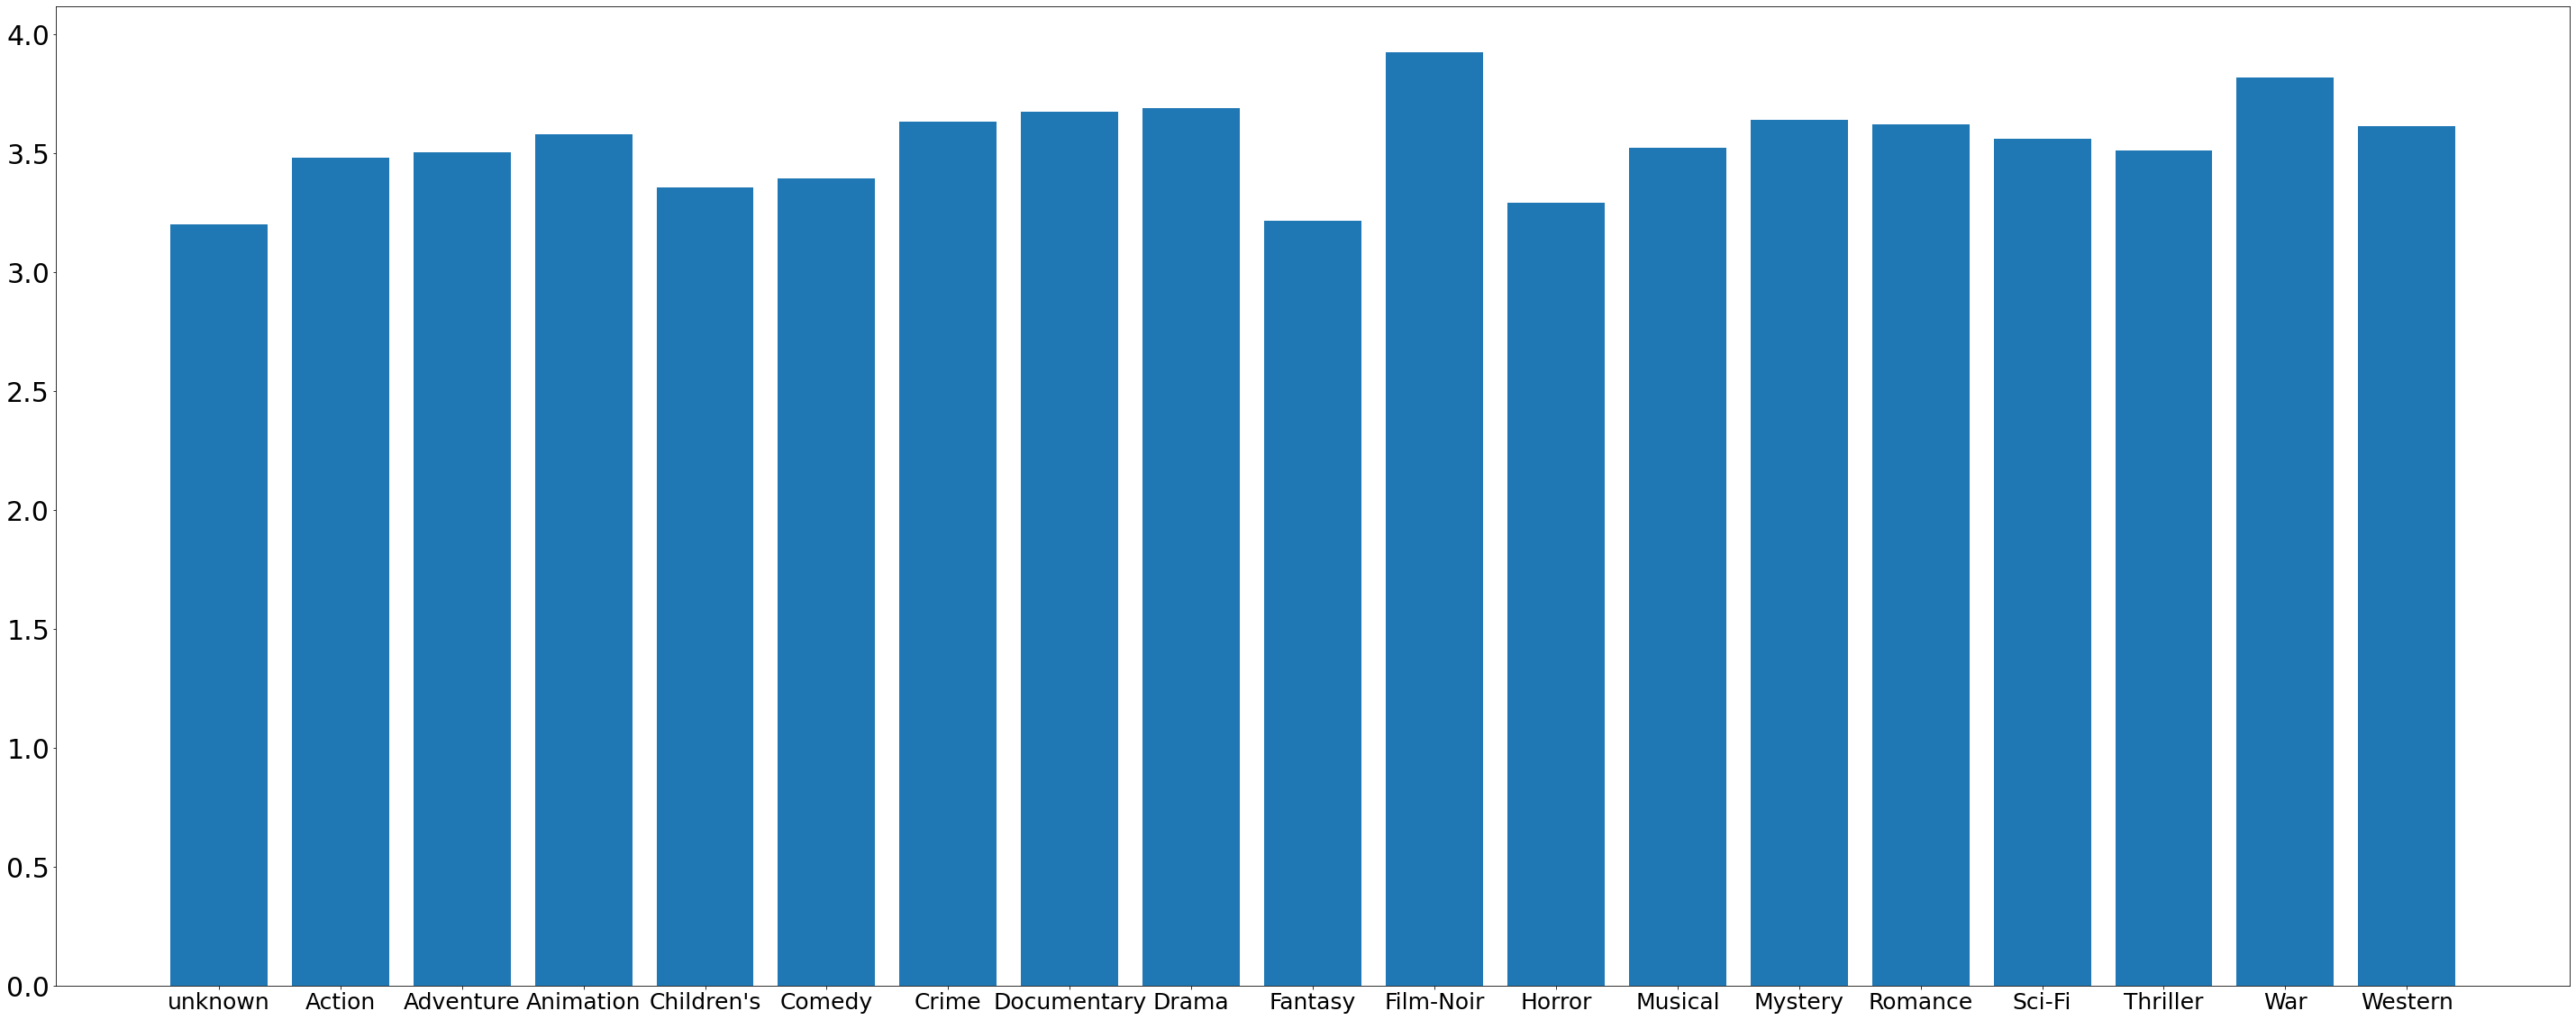

In [41]:
plt.figure(figsize=(50,20))
plt.xticks(fontsize=25)
plt.yticks(fontsize=30)
plt.bar(x=genres,height=proseci)

In [42]:
min_god=np.min(users['age'].values)
max_god=np.max(users['age'].values)


In [43]:
print('Najstariji korisnik ima',max_god,'god')
print('Najmladji korisnik ima',min_god,'god')

Najstariji korisnik ima 73 god
Najmladji korisnik ima 7 god


Hoćemo da vidimo koji su žanrovi najviše ocenjivani, u zavisnosti od starosti korisnika. Na y osi će biti rasponi godišta, a na x osi žanrovi filmova. Jačina polja toplotne mape zavisiće od toga koliko korisnika iz odgovarajućeg starosnog doba je davalo ocene filmovima odgovarajućeg žanra.

In [44]:
godine=[7,18,28,38,48,58,73]
brojevi_godine_zanrovi=np.zeros((len(godine)-1,19),dtype='int')

zanrovi_values=zanrovi.values
for userId,movieId,rating,_ in data.raw_ratings:
    userId=int(userId)-1
    movieId=int(movieId)-1
    for i in range(0,len(godine)-1):
        for j in range(3,22):
            if(users_values[userId][1]>=godine[i] and users_values[userId][1]<=godine[i+1]):
                if(zanrovi_values[movieId][j]==1):
                #j-3 je indeks zanra
                    brojevi_godine_zanrovi[i][j-3]+=1

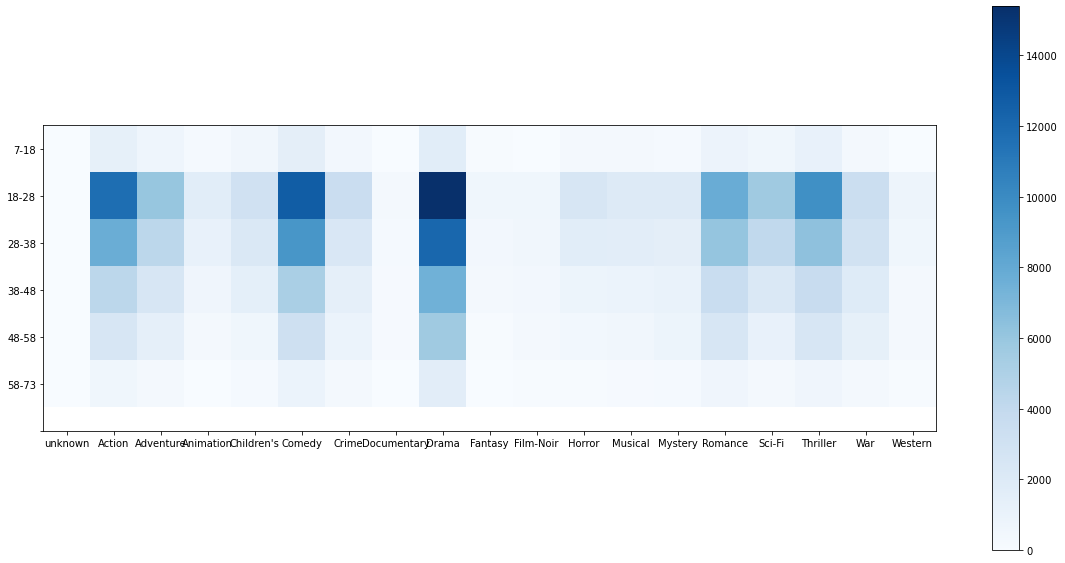

In [61]:
plt.figure(figsize=(20,10))
plt.imshow(brojevi_godine_zanrovi,cmap='Blues')
plt.yticks(range(0,7),['7-18','18-28','28-38','38-48','48-58','58-73'])
plt.xticks(range(0,19),genres)
plt.colorbar()